# PSTAT 100 Final Project

**Project Title:** Exploring Global Happiness and Wellbeing: An Analysis of Factors Influencing Life Satisfaction Across Countries from 2008 to 2023

**Project Theme:** The project aims to investigate the determinants of happiness and life satisfaction among nations, focusing on key factors such as economic development, social support, health, freedom, generosity, corruption perception, and emotional wellbeing. By analyzing data from the World Happiness Report spanning the years 2008 to 2023, the study seeks to gain deeper insights into the complex relationships that contribute to global happiness trends and disparities.

In [1]:
# Environment Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import altair as alt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

**Project Steps:**

**1. Data Collection and Preprocessing:**
   - Obtain the World Happiness Report dataset for the years 2008 to 2023, including variables such as Life Ladder (happiness score), Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, and Negative affect.
   - Check for missing data and handle any inconsistencies or outliers.
   - Group the data by country and perform necessary transformations to prepare it for analysis.

**(a)** Determined the number of different countries in the dataset.

In [2]:
whr_raw = pd.read_csv('data/whr-2023.csv')

unique_countries = whr_raw['Country name'].nunique()
print(unique_countries)

165


There are 165 unique countries in this dataset.

In [3]:
# Check for missing values for the overall dataset
missing_values = whr_raw.isnull()
missing_prop = missing_values.mean()

# Display the missing value counts for each column
print("Missing Value Proportion:")
print(missing_prop)

Missing Value Proportion:
Country name                        0.000000
year                                0.000000
Life Ladder                         0.000000
Log GDP per capita                  0.009095
Social support                      0.005912
Healthy life expectancy at birth    0.024557
Freedom to make life choices        0.015007
Generosity                          0.033197
Perceptions of corruption           0.052751
Positive affect                     0.010914
Negative affect                     0.007276
dtype: float64


Noticing that not all countries have happiness data from 2008 to 2023, the following steps will count the missing data for each year and find the year with the most country numbers.

In [4]:
# Group the data by 'Country name'
grouped_by_country = whr_raw.groupby('Country name')

# Find the missing years for each country
missing_years_dict = {}
whr_filled_list = []
for country, group_data in grouped_by_country:
    all_years = set(range(2008, 2023))  # Assuming the years range from 2000 to 2023
    missing_years = all_years - set(group_data['year'])
    missing_years_dict[country] = list(missing_years)

'''
# Display the missing years for each country
for country, missing_years in missing_years_dict.items():
    if missing_years:
        print(f"Missing years for {country}: {missing_years}")
    else:
        print(f"No missing years for {country}")
'''
        
        
    

'\n# Display the missing years for each country\nfor country, missing_years in missing_years_dict.items():\n    if missing_years:\n        print(f"Missing years for {country}: {missing_years}")\n    else:\n        print(f"No missing years for {country}")\n'

In [5]:
for country, group_data in grouped_by_country:
    all_years = set(range(2008, 2023))  # Assuming the years range from 2000 to 2023
    missing_years = all_years - set(group_data['year'])
    missing_years_dict[country] = list(missing_years)

'''
# Display the missing years for each country
for country, missing_years in missing_years_dict.items():
    if missing_years:
        print(f"Missing years for {country}: {missing_years}")
    else:
        print(f"No missing years for {country}")
 
'''
       
# Create a dictionary to store the count of missing countries for each year
missing_countries_count = {}

# Iterate through the missing_years_dict to count the missing countries for each year
for country, missing_years in missing_years_dict.items():
    for year in missing_years:
        if year not in missing_countries_count:
            missing_countries_count[year] = 1
        else:
            missing_countries_count[year] += 1


# Find the year with the least missing countries
year_with_least_missing_countries = min(missing_countries_count, key=missing_countries_count.get)
least_missing_countries_count = missing_countries_count[year_with_least_missing_countries]

# Display the year with the least missing countries and the count of missing countries for that year
print("Year with the least missing countries:", year_with_least_missing_countries)
print("Number of missing countries:", least_missing_countries_count)

# Create a dictionary to store missing countries for each year
missing_countries_by_year = {}

# Iterate through the missing_years_dict to collect missing countries for each year
for country, missing_years in missing_years_dict.items():
    for year in missing_years:
        if year not in missing_countries_by_year:
            missing_countries_by_year[year] = [country]
        else:
            missing_countries_by_year[year].append(country)


# Display the count of missing countries for each year

for year, count in missing_countries_count.items():
    print(f"Year {year} has {count} missing countries.")



Year with the least missing countries: 2017
Number of missing countries: 18
Year 2020 has 49 missing countries.
Year 2008 has 55 missing countries.
Year 2022 has 51 missing countries.
Year 2009 has 51 missing countries.
Year 2013 has 29 missing countries.
Year 2015 has 23 missing countries.
Year 2016 has 24 missing countries.
Year 2017 has 18 missing countries.
Year 2018 has 24 missing countries.
Year 2019 has 22 missing countries.
Year 2021 has 43 missing countries.
Year 2010 has 41 missing countries.
Year 2011 has 19 missing countries.
Year 2012 has 24 missing countries.
Year 2014 has 21 missing countries.


When determining the correlation between variables in the dataset, it is generally preferable to use the data from the year 2017 rather than the overall mean for each country. Here's why:

**(a)** More Complete Data: The dataset for the year 2017 contains the most complete data for countries compared to other years. Using the data from 2017 ensures that we have a larger and more representative sample size for the correlation analysis.

**(b)** Temporal Relevance: The year 2017 is the most recent year in the dataset, and its data is temporally relevant for conducting a correlation analysis. Using the overall mean for each country combines data from various years, which may not accurately reflect the current relationships between variables.

**(c)** Avoiding Bias: Calculating the overall mean for each country may introduce bias in the correlation analysis. Different years might have had varying events or socio-economic situations that could impact the correlation between variables. Using data from a single year (2017) helps avoid such biases.

**(d)** Comparability: By using data from the same year (2017), we ensure that the variables are comparable, as they are measured under similar conditions and contexts.

While using the overall mean for each country might seem like a way to fill in missing data, it could lead to misleading correlation results, especially if the missing data is not missing at random.

Therefore, in this case, it is more appropriate to use the data from the year 2017 to determine the correlation between variables in the dataset. This approach provides a more robust and meaningful analysis of the relationships between variables, given the completeness and relevance of the data for that specific year.

In [6]:
whr_2011 = whr_raw[whr_raw.year == 2011]
whr_2017 = whr_raw[whr_raw.year == 2017]

In [7]:
# Check for missing values for dataset 2011
missing_values_2011 = whr_2011.isnull()
missing_prop_2011 = missing_values.mean()

# Display the missing value counts for each column
print("Missing Value Proportion:")
print(missing_prop_2011)

Missing Value Proportion:
Country name                        0.000000
year                                0.000000
Life Ladder                         0.000000
Log GDP per capita                  0.009095
Social support                      0.005912
Healthy life expectancy at birth    0.024557
Freedom to make life choices        0.015007
Generosity                          0.033197
Perceptions of corruption           0.052751
Positive affect                     0.010914
Negative affect                     0.007276
dtype: float64


In [8]:
# Check for missing values for dataset 2017
missing_values_2017 = whr_2017.isnull()
missing_prop_2017 = missing_values.mean()

# Display the missing value counts for each column
print("Missing Value Proportion:")
print(missing_prop_2017)

Missing Value Proportion:
Country name                        0.000000
year                                0.000000
Life Ladder                         0.000000
Log GDP per capita                  0.009095
Social support                      0.005912
Healthy life expectancy at birth    0.024557
Freedom to make life choices        0.015007
Generosity                          0.033197
Perceptions of corruption           0.052751
Positive affect                     0.010914
Negative affect                     0.007276
dtype: float64


**()** groups the data by country, calculates the mean of numerical columns for each country, converts the 'Country name' from the index to a regular column, and then displays the resulting DataFrame showing the mean values for each country in the dataset.

In [9]:
# Group the data by country
whr_grouped = whr_raw.groupby('Country name').mean()
whr_grouped.reset_index(inplace=True)

# Display the updated grouped data with 'Country name' as a regular column
print(whr_grouped.head())

  Country name         year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2014.642857     3.346643            7.585615        0.484500   
1      Albania  2014.933333     5.047933            9.396933        0.715800   
2      Algeria  2015.800000     5.377400            9.339800        0.814889   
3       Angola  2012.500000     4.420250            8.985750        0.738250   
4    Argentina  2014.000000     6.283588           10.030412        0.902412   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         52.533929                      0.498571    0.060000   
1                         68.505333                      0.683133   -0.074733   
2                         66.080000                      0.530875   -0.141000   
3                         52.150000                      0.456250   -0.090500   
4                         66.664706                      0.774529   -0.152471   

   Perceptions of corruption  Po

**2. Descriptive Statistics and Data Visualization:**
   - Calculate summary statistics for each variable to gain a general understanding of the dataset.
   - Create data visualizations such as bar charts, scatter plots, and heatmaps to visualize the distribution and relationships between different variables.
   - Analyze the trends in the overall global happiness index and compare happiness scores across countries and regions.

**Distribution Comparison**

When comparing distributions over time, it's generally beneficial to choose years that have the least amount of missing data, as this will provide a more complete and accurate comparison.

The year 2017 has the fewest missing countries, with only 18 missing. The year 2011 is the next best choice, with 19 missing countries.

Therefore, the years 2017 and 2011 would be the most suitable for comparing distributions, as they have the least amount of missing data and would likely provide the most accurate representation of the overall trends and changes during that time period. Additionally, selecting these years will provide a 6-year time span, which may be significant enough to observe meaningful changes in the data.

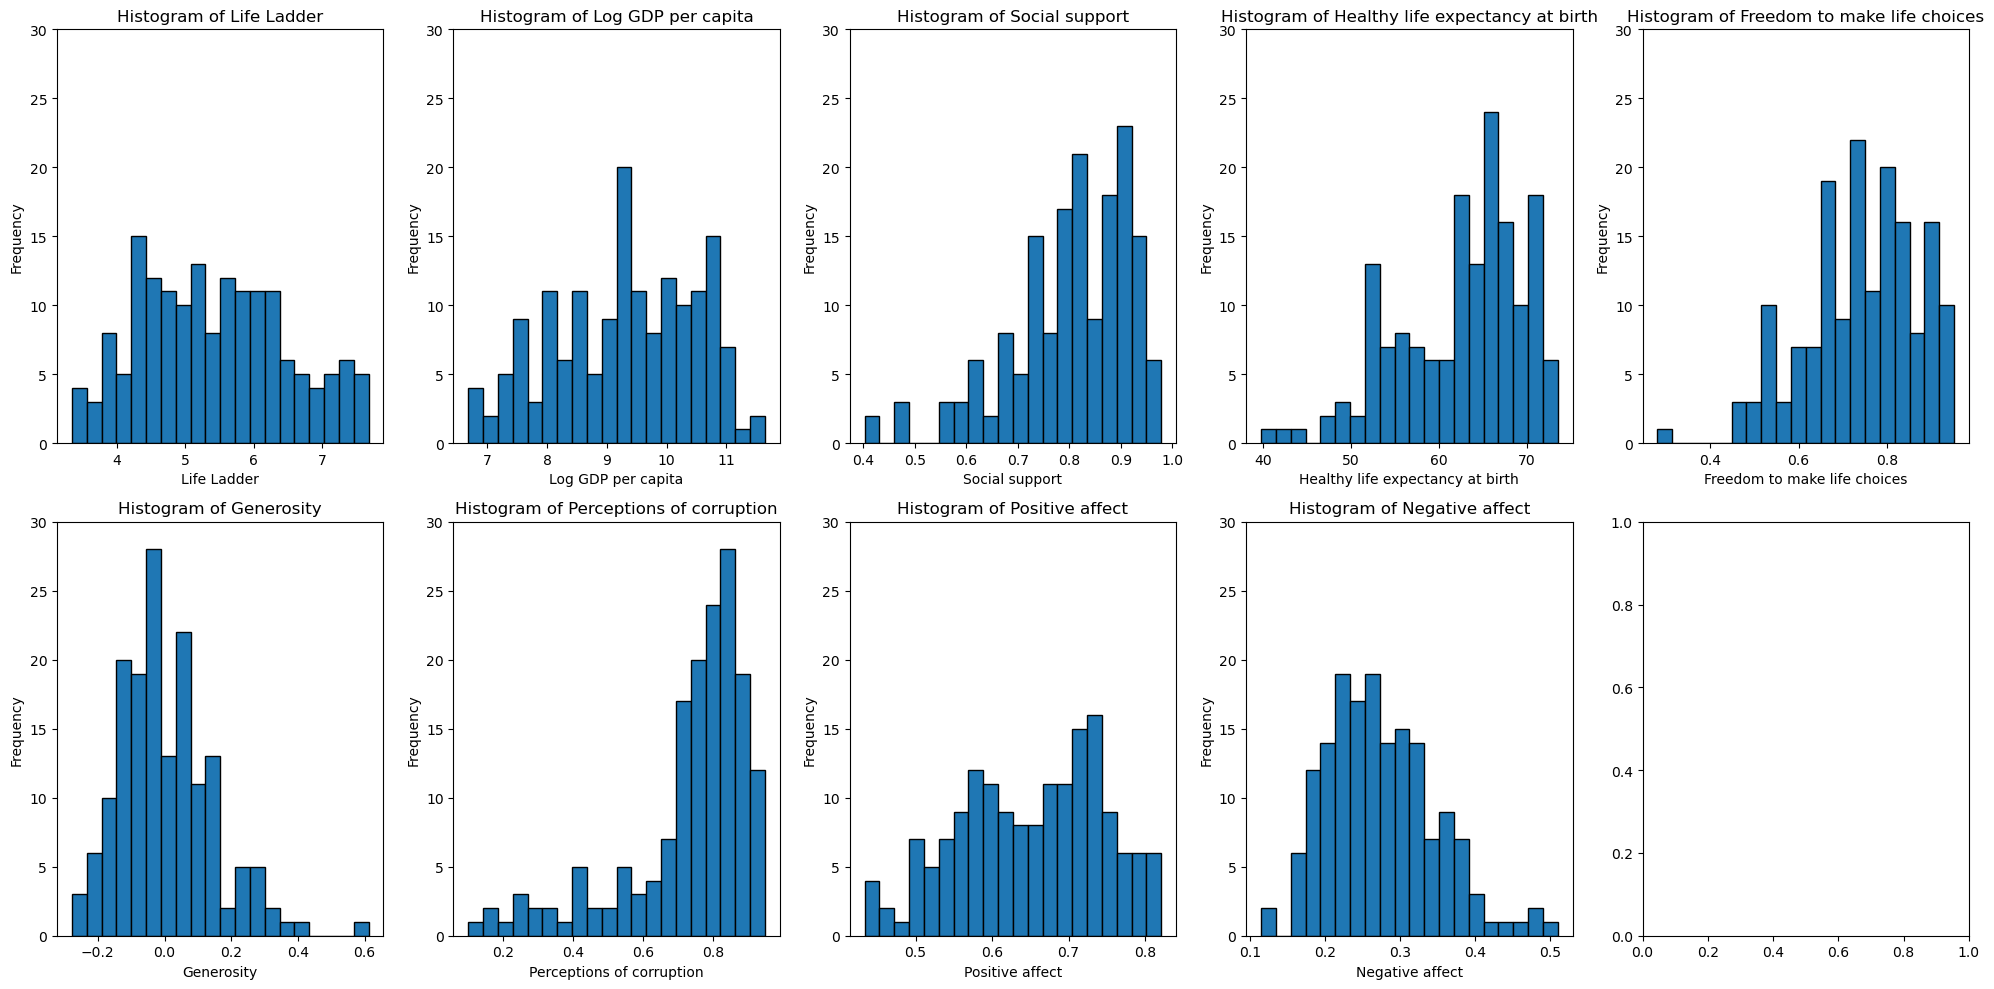

In [10]:
# Get the list of columns (excluding 'Country name' and 'year')
data_columns = whr_grouped.columns[2:]
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Plot a histogram for each variable
for i, column in enumerate(data_columns):
    row, col = divmod(i, 5)  # Calculate row and column indices for the 2x5 grid
    axs[row, col].hist(whr_grouped[column], bins=20, edgecolor='black')
    axs[row, col].set_title(f'Histogram of {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_ylim(0, 30)

# Adjust layout and spacing between subplots
plt.tight_layout()

# Display
plt.show()

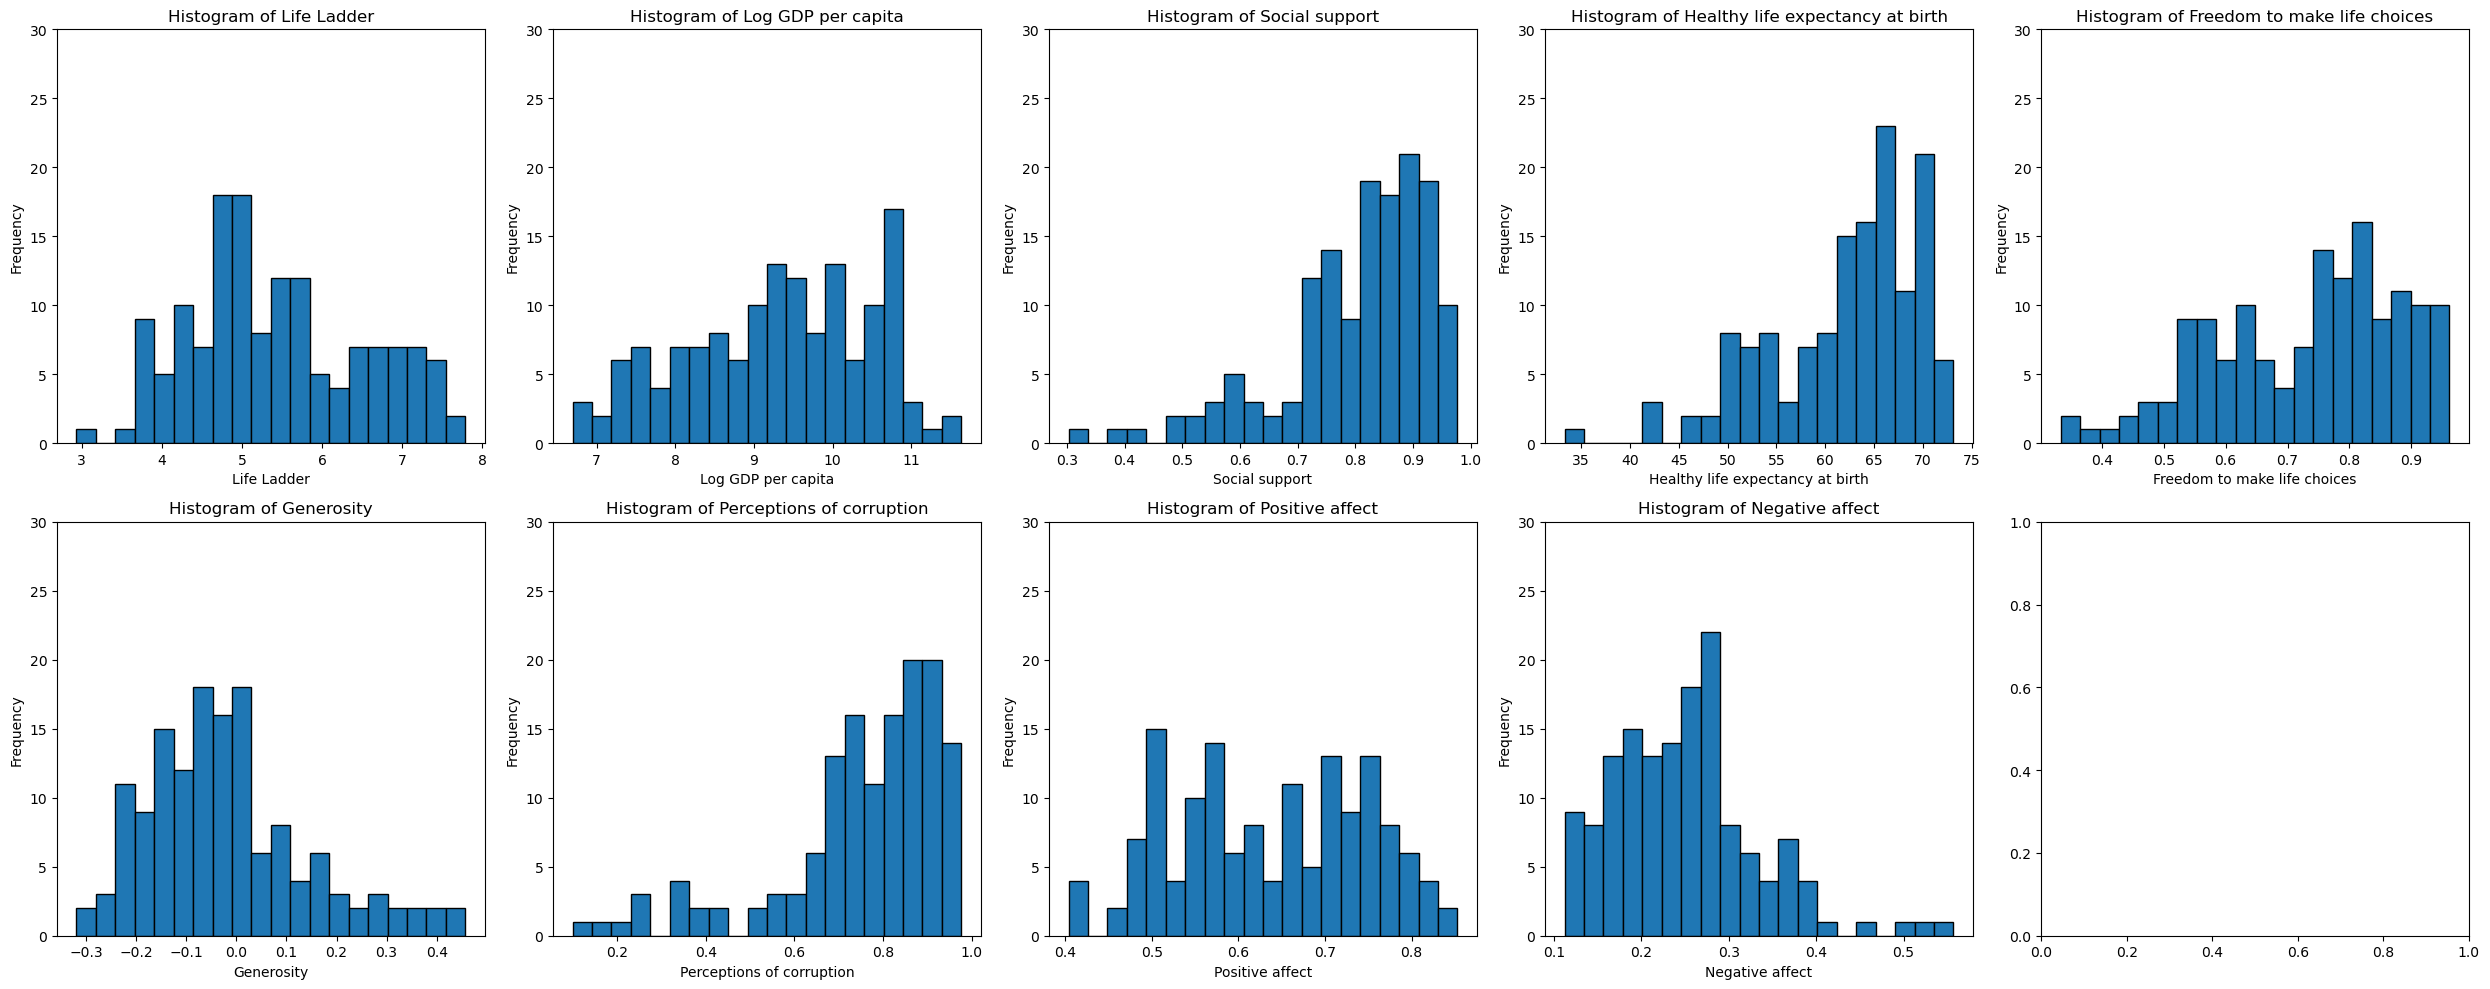

In [11]:
# Get the list of columns (excluding 'Country name' and 'year')
data_columns = whr_2011.columns[2:]
fig, axs = plt.subplots(2, 5, figsize=(25, 10))

# Plot a histogram for each variable
for i, column in enumerate(data_columns):
    row, col = divmod(i, 5)  # Calculate row and column indices for the 2x5 grid
    axs[row, col].hist(whr_2011[column], bins=20, edgecolor='black')
    axs[row, col].set_title(f'Histogram of {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_ylim(0, 30)

# Adjust layout and spacing between subplots
plt.tight_layout()

# Display
plt.show()

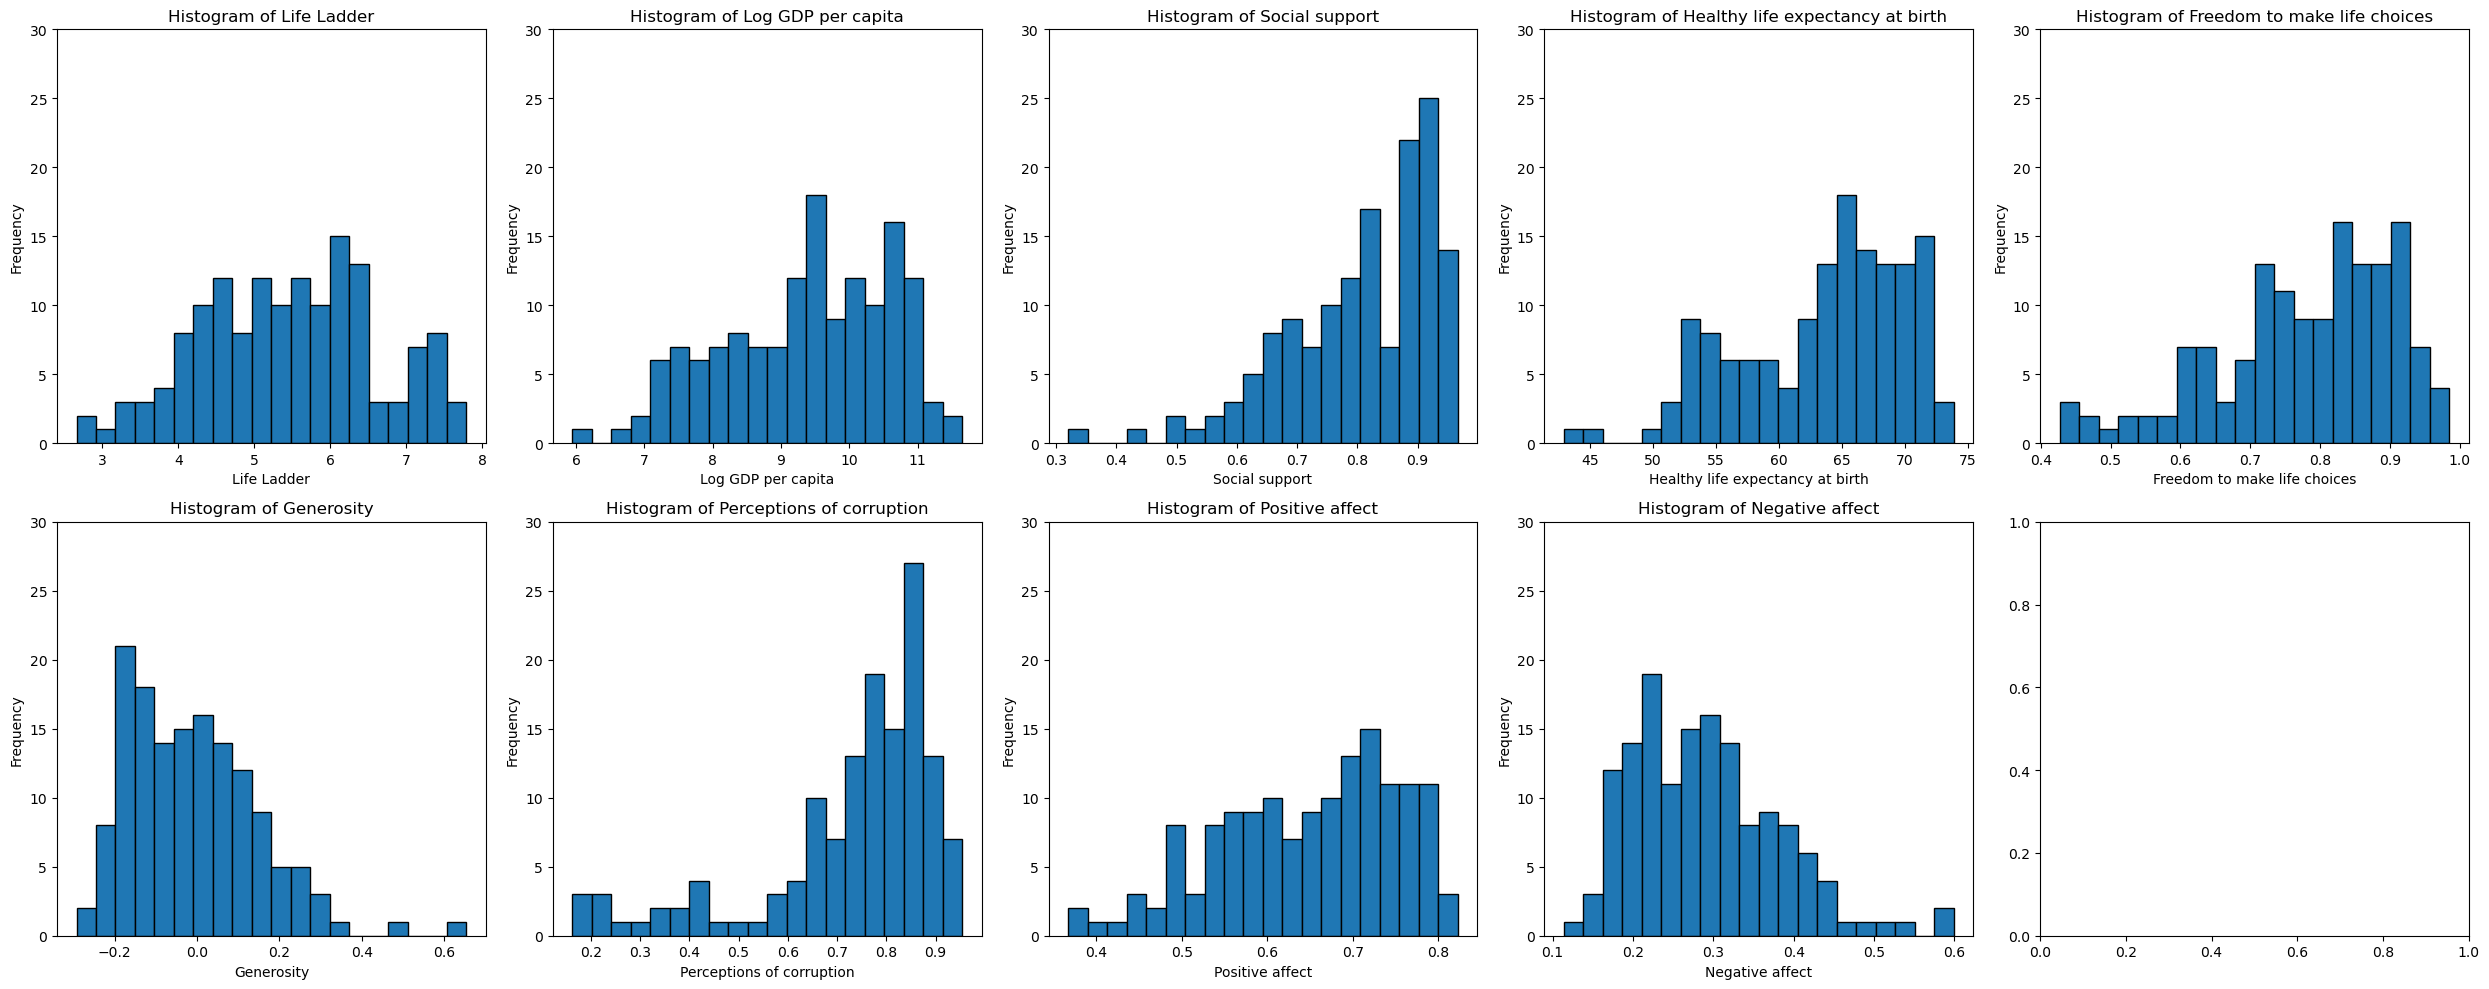

In [12]:
# Get the list of columns (excluding 'Country name' and 'year')
data_columns = whr_2017.columns[2:]
fig, axs = plt.subplots(2, 5, figsize=(25, 10))

# Plot a histogram for each variable
for i, column in enumerate(data_columns):
    row, col = divmod(i, 5)  # Calculate row and column indices for the 2x5 grid
    axs[row, col].hist(whr_2017[column], bins=20, edgecolor='black')
    axs[row, col].set_title(f'Histogram of {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_ylim(0, 30)

# Adjust layout and spacing between subplots
plt.tight_layout()

# Display
plt.show()

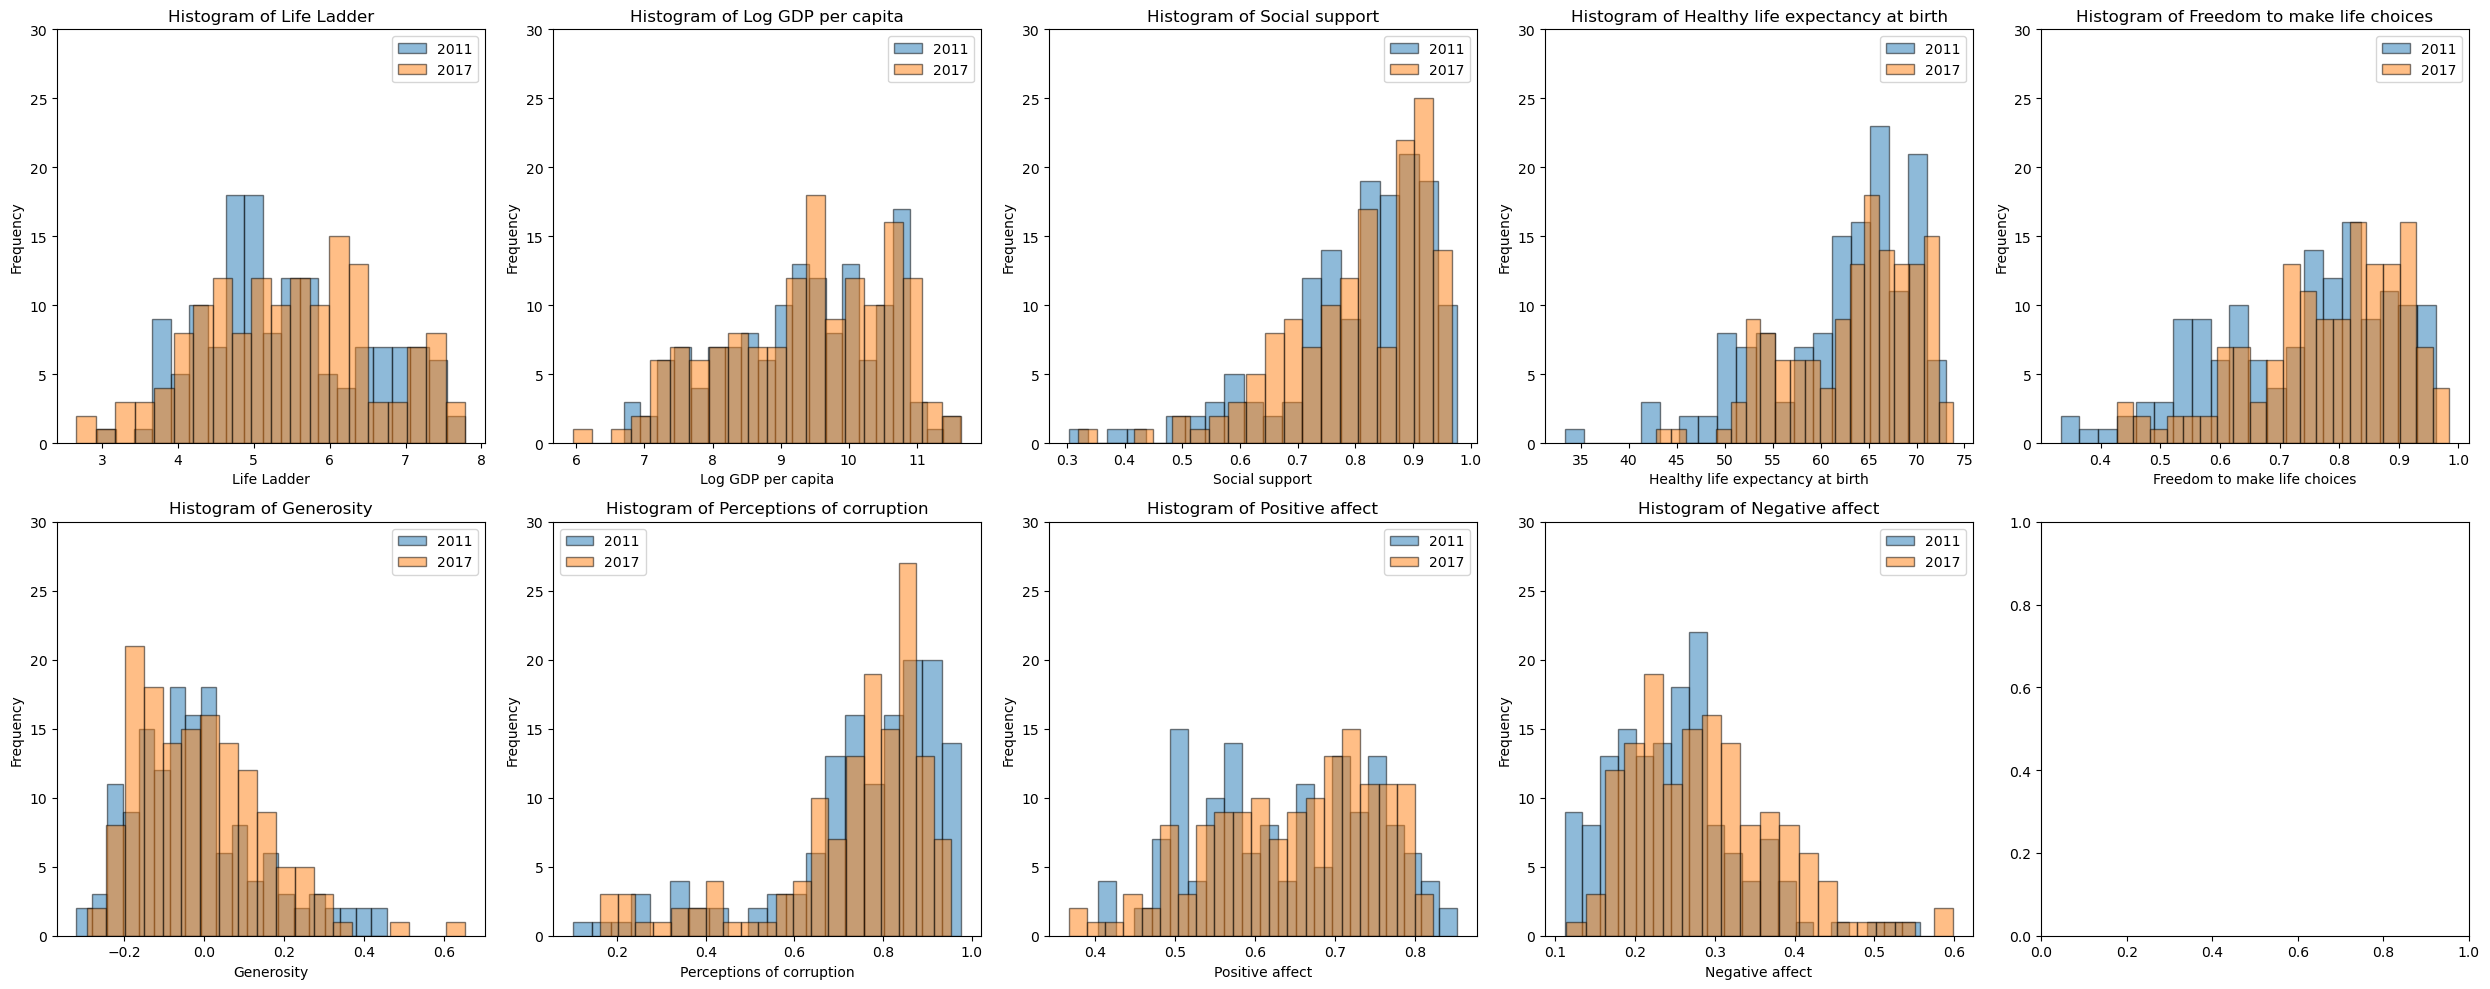

In [13]:
# Get the list of columns (excluding 'Country name' and 'year')
data_columns = whr_2017.columns[2:]

# Create a figure with subplots
fig, axs = plt.subplots(2, 5, figsize=(25, 10))

# Plot a histogram for each variable for both years
for i, column in enumerate(data_columns):
    row, col = divmod(i, 5)  # Calculate row and column indices for the 2x5 grid
    axs[row, col].hist(whr_2011[column], bins=20, edgecolor='black', alpha=0.5, label='2011')
    axs[row, col].hist(whr_2017[column], bins=20, edgecolor='black', alpha=0.5, label='2017')
    axs[row, col].set_title(f'Histogram of {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_ylim(0, 30)
    axs[row, col].legend()  # Add a legend to each subplot

# Adjust layout and spacing between subplots
plt.tight_layout()

# Display
plt.show()


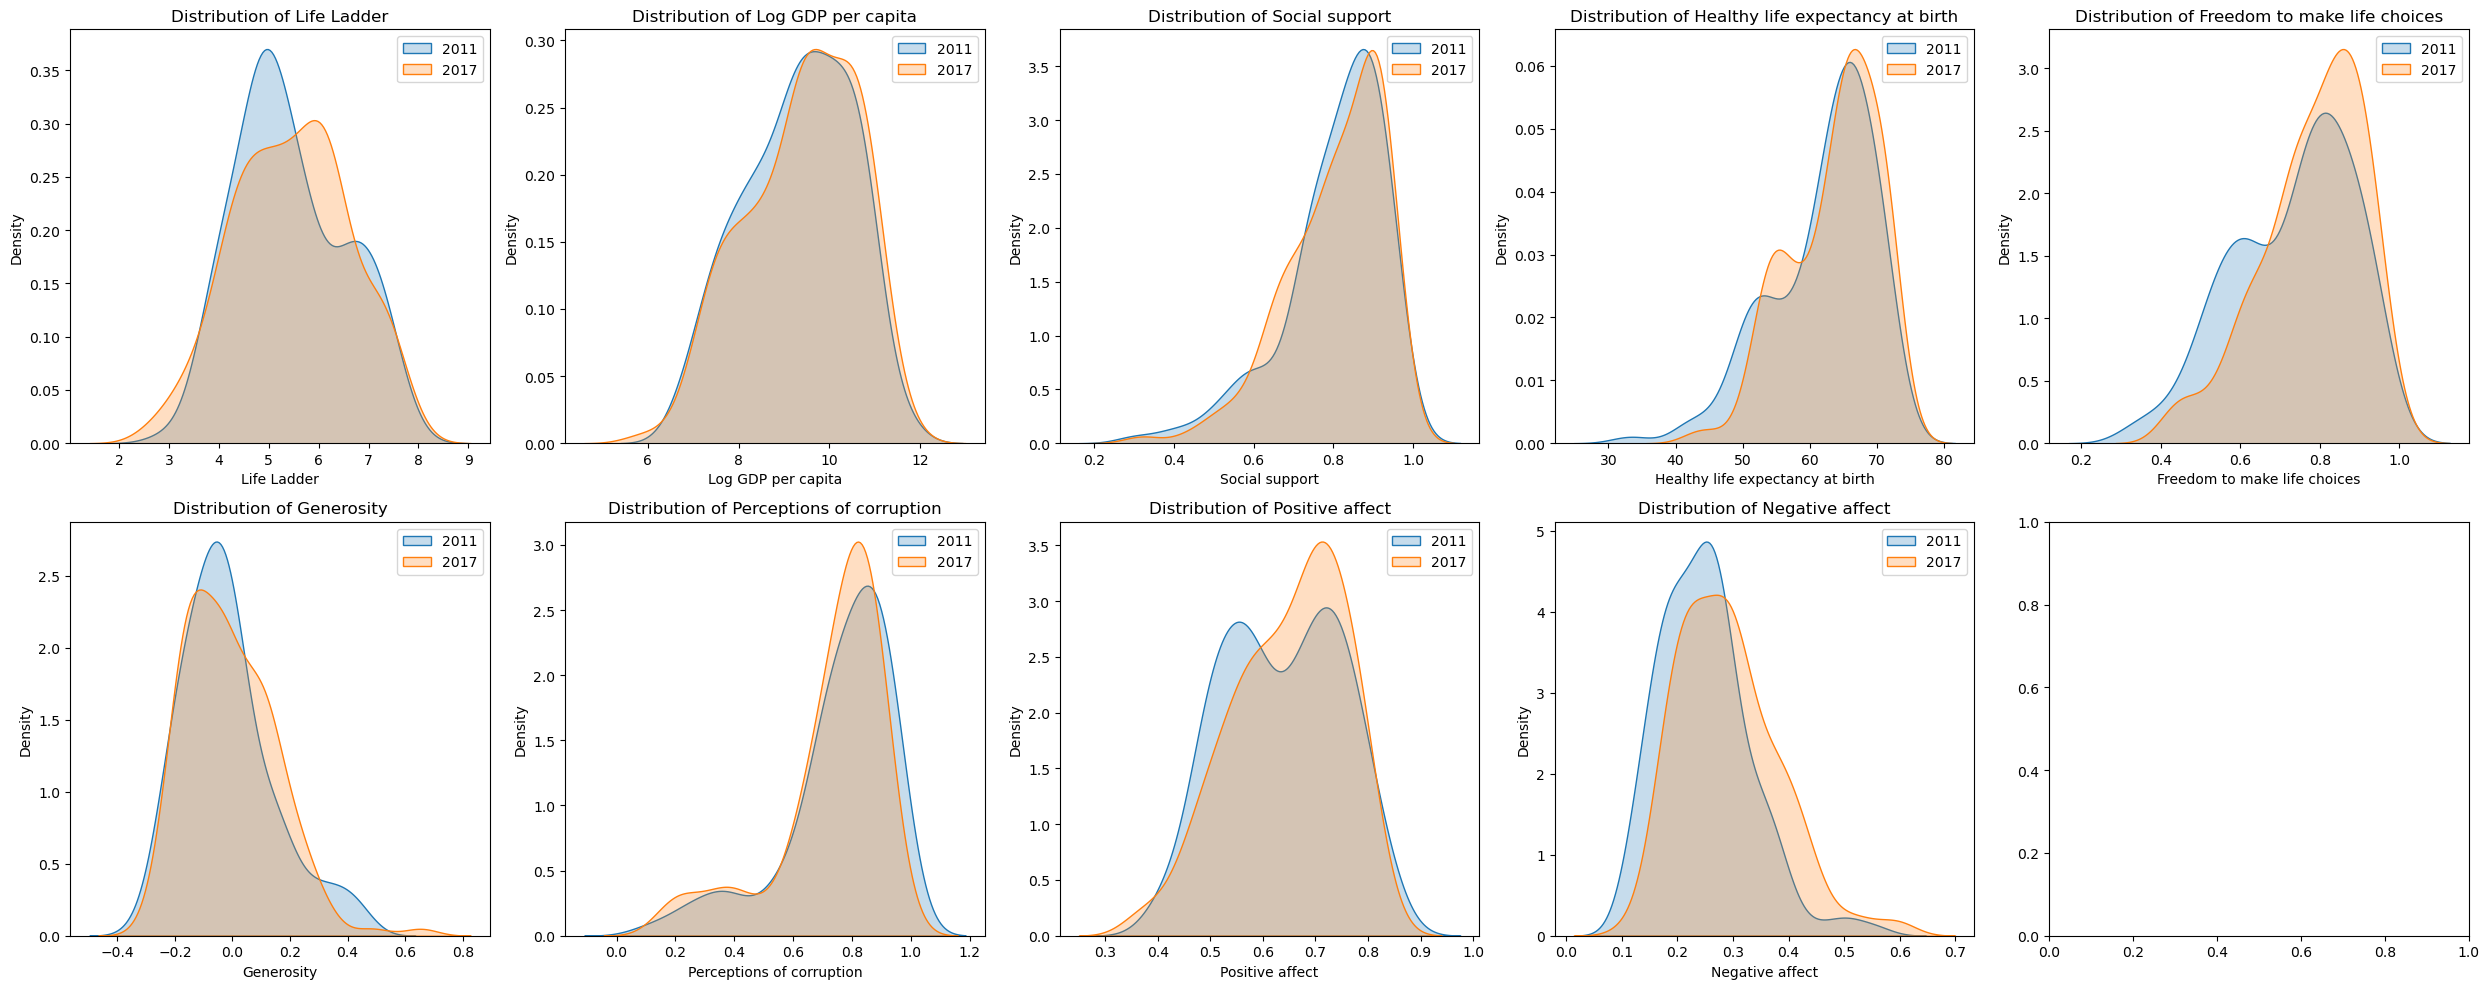

In [14]:
# Get the list of columns (excluding 'Country name' and 'year')
data_columns = whr_2017.columns[2:]

# Create a figure with subplots
fig, axs = plt.subplots(2, 5, figsize=(25, 10))

# Plot a KDE for each variable for both years
for i, column in enumerate(data_columns):
    row, col = divmod(i, 5)  # Calculate row and column indices for the 2x5 grid
    sns.kdeplot(whr_2011[column], shade=True, ax=axs[row, col], label='2011')
    sns.kdeplot(whr_2017[column], shade=True, ax=axs[row, col], label='2017')
    axs[row, col].set_title(f'Distribution of {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Density')
    axs[row, col].legend()  # Add a legend to each subplot

# Adjust layout and spacing between subplots
plt.tight_layout()

# Display
plt.show()

In [15]:
'''
# Dictionary to store tables for each variable
tables = {}

fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Plot a histogram for each variable
for i, column in enumerate(data_columns):
    row, col = divmod(i, 5)  # Calculate row and column indices for the 2x5 grid
    axs[row, col].hist(whr_2011[column], bins=20, edgecolor='black')
    axs[row, col].set_title(f'Histogram of {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_ylim(0, 30)
    # Calculate histogram frequencies and bins
    frequencies, bins, _ = axs[row, col].hist(whr_2011[column], bins=20, edgecolor='black')
    
    # Create a DataFrame with the calculated frequencies and ranges
    ranges = [f"{bins[i]:.2f} - {bins[i + 1]:.2f}" for i in range(len(bins) - 1)]
    table = pd.DataFrame({'Range': ranges, 'Frequency': frequencies.astype(int)})
    
    # Store the DataFrame in the tables dictionary
    tables[column] = table

# You can then access and print the tables as needed
for column, table in tables.items():
    print(f"Histogram of {column} in year 2011:")
    print(table)
    print()
'''

'\n# Dictionary to store tables for each variable\ntables = {}\n\nfig, axs = plt.subplots(2, 5, figsize=(20, 10))\n\n# Plot a histogram for each variable\nfor i, column in enumerate(data_columns):\n    row, col = divmod(i, 5)  # Calculate row and column indices for the 2x5 grid\n    axs[row, col].hist(whr_2011[column], bins=20, edgecolor=\'black\')\n    axs[row, col].set_title(f\'Histogram of {column}\')\n    axs[row, col].set_xlabel(column)\n    axs[row, col].set_ylabel(\'Frequency\')\n    axs[row, col].set_ylim(0, 30)\n    # Calculate histogram frequencies and bins\n    frequencies, bins, _ = axs[row, col].hist(whr_2011[column], bins=20, edgecolor=\'black\')\n    \n    # Create a DataFrame with the calculated frequencies and ranges\n    ranges = [f"{bins[i]:.2f} - {bins[i + 1]:.2f}" for i in range(len(bins) - 1)]\n    table = pd.DataFrame({\'Range\': ranges, \'Frequency\': frequencies.astype(int)})\n    \n    # Store the DataFrame in the tables dictionary\n    tables[column] = table\

In [16]:
'''
# Dictionary to store tables for each variable
tables = {}

fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Plot a histogram for each variable
for i, column in enumerate(data_columns):
    row, col = divmod(i, 5)  # Calculate row and column indices for the 2x5 grid
    axs[row, col].hist(whr_2017[column], bins=20, edgecolor='black')
    axs[row, col].set_title(f'Histogram of {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_ylim(0, 30)
    # Calculate histogram frequencies and bins
    frequencies, bins, _ = axs[row, col].hist(whr_2017[column], bins=20, edgecolor='black')
    
    # Create a DataFrame with the calculated frequencies and ranges
    ranges = [f"{bins[i]:.2f} - {bins[i + 1]:.2f}" for i in range(len(bins) - 1)]
    table = pd.DataFrame({'Range': ranges, 'Frequency': frequencies.astype(int)})
    
    # Store the DataFrame in the tables dictionary
    tables[column] = table

# You can then access and print the tables as needed
for column, table in tables.items():
    print(f"Histogram of {column} in year 2017:")
    print(table)
    print()

'''

'\n# Dictionary to store tables for each variable\ntables = {}\n\nfig, axs = plt.subplots(2, 5, figsize=(20, 10))\n\n# Plot a histogram for each variable\nfor i, column in enumerate(data_columns):\n    row, col = divmod(i, 5)  # Calculate row and column indices for the 2x5 grid\n    axs[row, col].hist(whr_2017[column], bins=20, edgecolor=\'black\')\n    axs[row, col].set_title(f\'Histogram of {column}\')\n    axs[row, col].set_xlabel(column)\n    axs[row, col].set_ylabel(\'Frequency\')\n    axs[row, col].set_ylim(0, 30)\n    # Calculate histogram frequencies and bins\n    frequencies, bins, _ = axs[row, col].hist(whr_2017[column], bins=20, edgecolor=\'black\')\n    \n    # Create a DataFrame with the calculated frequencies and ranges\n    ranges = [f"{bins[i]:.2f} - {bins[i + 1]:.2f}" for i in range(len(bins) - 1)]\n    table = pd.DataFrame({\'Range\': ranges, \'Frequency\': frequencies.astype(int)})\n    \n    # Store the DataFrame in the tables dictionary\n    tables[column] = table\

**Life Ladder**: The given histogram represents the distribution of the "Life Ladder," with values ranging from 2.66 to 7.79, divided into 20 intervals. The data is somewhat symmetrical, with a slight right skew, and doesn't show significant peaks or heavy tails.

The mean would provide an overall average, and the median would likely fall in the middle of the distribution. The mode, the value appearing most often, falls in the range of 5.99 - 6.25. The data is relatively spread out from 3.94 to 6.76, with fewer values at the extremes. The variance and standard deviation would give a precise measure of this spread.

Most observations lie in a middle range, with notable peaks around 5.99 - 6.25, and fewer at the extremes. The distribution might indicate that most subjects are clustered around a moderate level of the attribute being measured, with a lean towards higher values. The specific meaning could vary depending on what "Life Ladder" represents. More detailed analysis would require the context or raw data.

*Shift in data from 2011 to 2017*: The distribution of the "Life Ladder" variable seems to have become more evenly spread from 2011 to 2017, with a slight shift towards higher values.

**Log GDP per Capita**: The distribution of "Log GDP per capita" ranges from 5.94 to 11.65. The majority of the frequencies are concentrated in the range of 7.08 to 10.80, with a right-skewed pattern. The mode, representing the most common value, falls in the range of 9.37 - 9.65 with a frequency of 18. There is an absence of data in the 6.23 - 6.51 range, and values become less frequent at the extremes, especially towards the higher end. This distribution may indicate a greater prevalence of higher-income economies within the dataset, with fewer entities at the economic extremes.

*Shift in data from 2011 to 2017*: The distribution of Log GDP per capita between the years 2011 and 2017 shows several interesting changes. In 2011, the distribution appears to be more spread across the range, starting from 6.69 and extending up to 11.63, with a noticeable concentration in the higher ranges. In contrast, the 2017 distribution starts from a lower value of 5.94 and is more evenly distributed, with a distinct peak in the 9.37 - 9.65 range. There are fewer occurrences in the lower ranges of 2011 compared to 2017, indicating a shift towards higher GDP values in 2011. However, in 2017 the frequencies are more balanced across the spectrum, showing a slightly more uniform distribution. The higher frequencies in the middle-to-upper ranges in 2017 might indicate economic growth in various regions, but there's also an introduction of a lower range that wasn't present in 2011. The changes between the two years may reflect economic developments, policy changes, or other factors influencing GDP per capita across different regions or countries

**Social support**: The given histogram represents the distribution of "Social support," with values ranging from 0.32 to 0.97. The distribution appears to be right-skewed, with the majority of the values concentrated in the 0.64 to 0.97 range.

The mode, or the value appearing most often, falls in the range of 0.90 - 0.93 with a frequency of 25. This suggests that the most common level of social support falls within this range. There are some gaps in the data, particularly in the ranges of 0.35 - 0.38, 0.38 - 0.42, and 0.45 - 0.48, where the frequency is zero. This may indicate a specific pattern or threshold in social support levels.

The distribution could imply that the majority of entities (possibly individuals or communities) experience higher levels of social support, with only a few instances of extremely low support. This observation might reflect societal factors, but further context or data would be required for a more detailed understanding.

*Shift in data from 2011 to 2017*: The comparison of the distribution of Social Support between 2011 and 2017 reveals noticeable shifts. In 2011, there is a broader distribution across the lower to middle ranges, whereas in 2017, the concentration seems to have moved more towards the higher ranges. The frequencies in the lower ranges (from 0.30 to 0.54) are relatively low in both years, but they are almost non-existent in 2017. This shift is more apparent in the upper ranges, particularly from 0.74 onwards. In 2017, the frequencies increase in these higher brackets, with a significant concentration in the 0.87 - 0.93 range, which also surpasses the corresponding frequencies in 2011. Meanwhile, the frequencies in the 0.84 - 0.88 and 0.91 - 0.94 ranges in 2011 are notably higher than those in the corresponding ranges in 2017. This pattern suggests an overall improvement in Social Support levels, with a marked increase in the higher values in 2017. The changes could be indicative of enhancements in social welfare policies, community engagement, or other factors contributing to social support in the observed regions or countries.

**Health Life Expectation at Birth**: The histogram for "Healthy life expectancy at birth" shows a distribution ranging from 42.90 to 73.85 years. This distribution has a somewhat normal shape with a slight right skew.

The majority of frequencies are concentrated in the range of 52.19 to 72.30, reflecting a central tendency in healthy life expectancy in the dataset. The mode, or the range with the highest frequency, is 64.56 - 66.11 with 18 occurrences. This indicates that the most common healthy life expectancy falls within this range. There are noticeable gaps in the 45.99 - 47.54 and 47.54 - 49.09 ranges, where no data is present. These gaps may reflect particular characteristics of the population being studied.

The distribution suggests that most of the entities (likely different countries or regions) in this sample have a healthy life expectancy clustered around the mid-60s, with fewer instances of extremely low or high values. The spread of the data might also reflect varying healthcare quality and availability, lifestyle factors, and other health determinants across the sample.

*Shift in data from 2011 to 2017*: Comparing the distribution of Healthy Life Expectancy at Birth between 2011 and 2017, we can observe a shift toward higher ranges in 2017. The distribution of 2011 starts from a much lower range of 33.32, with a very sparse presence in the lower ranges up to 45.26. This can be contrasted with the 2017 data, where the distribution starts from 42.90 and has a more even spread across the middle to upper ranges.

In 2011, the frequency peaks in the 65.16 - 67.15 range, with considerable frequency in the 61.18 - 71.13 interval. In 2017, the distribution becomes more uniform from 52.19 onwards, with no significant peaks, showing a broader spread across the middle to upper ranges. The increase in frequency in the higher ranges in 2017 suggests an overall improvement in healthy life expectancy in the observed period.

The lack of representation in the lower ranges in 2017, compared to 2011, signifies a possible reduction in areas with extremely low healthy life expectancy. This could be indicative of advancements in healthcare, nutrition, and living conditions in the regions or countries observed. It seems that life expectancy has generally increased and perhaps become more uniform across different areas between these two years.

**Freedom to Make Life Choice**: The given histogram represents the distribution of "Freedom to make life choices," with values ranging from 0.43 to 0.98. The distribution appears somewhat uniform in the middle ranges but shows concentrations in the 0.59 - 0.62, 0.71 - 0.76, and 0.82 - 0.93 ranges.

The modes, or the ranges with the highest frequencies, are found at 0.82 - 0.85 and 0.90 - 0.93, both with 16 occurrences. This indicates that the most common levels of freedom to make life choices fall within these ranges.

The distribution suggests a general trend of increasing freedom across the data, with more entities falling into the higher value ranges. There are fewer instances at the extremes, especially in the lower range from 0.43 - 0.54.

This data might reflect societal or governmental factors that affect an individual's autonomy and freedom to make decisions about their life. The specific interpretation may vary depending on the context in which "Freedom to make life choices" is defined, but generally, it appears that the entities in this sample have moderate to high levels of this attribute, with most clustering around the higher end.

*Shift in data from 2011 to 2017*: When comparing the distribution of Freedom to Make Life Choices between 2011 and 2017, several trends and shifts are noticeable.

In 2011, the distribution starts at a lower range of 0.33, whereas the data for 2017 begins at 0.43. The frequencies in the lower ranges are more evenly spread in 2011, whereas 2017 sees a more significant presence in the middle to higher ranges. The peak of the distribution in 2011 is in the range of 0.74 - 0.80, with notable concentrations around 0.52 - 0.68 as well. However, in 2017, the frequencies are more dispersed across the higher ranges, particularly from 0.71 to 0.96. The peaks are less pronounced, showing a broader, flatter distribution in the higher ranges.

One of the remarkable shifts is the increase in frequencies in the highest ranges from 0.82 onwards in 2017, which shows a more significant presence of higher values related to freedom to make life choices.

Overall, the distributions suggest an improvement or increase in the perceived freedom to make life choices in 2017 compared to 2011. The general shift towards the higher ranges and the lessening of the frequency in the lower ranges could be indicative of global trends toward more personal freedom, better governance, or societal changes that allow more autonomy in life decisions. The data could be interpreted as a positive trend in the aspect of human rights or personal liberties over the observed period.

**Generosity**: The histogram for "Generosity" shows a distribution ranging from -0.29 to 0.65. This distribution is left-skewed, with most of the values concentrated in the negative and near-zero ranges.

The mode, or the range with the highest frequency, is -0.20 - -0.15 with 21 occurrences, suggesting that the most common levels of generosity fall within this range. There's a steady decline in frequency as values become more positive, with notable gaps in the 0.37 - 0.42, 0.42 - 0.46, 0.51 - 0.56, and 0.56 - 0.61 ranges, where no data is present.

The presence of negative values in this context could indicate a measure of generosity that includes both giving and receiving, or possibly some form of deficit or lack of generosity.

This distribution might reflect the specific cultural, societal, or economic factors that influence generosity within the dataset. The majority of entities appear to have relatively low or even negative levels of this attribute, with only a few instances at the higher end of the range.

*Shift in data from 2011 to 2017*: The histograms of Generosity for the years 2011 and 2017 present some distinctive patterns, indicating a shift in the distribution of generosity over this period.

In 2011, the distribution of generosity is spread more broadly across both negative and positive values, with a peak frequency occurring in the negative ranges from -0.09 to -0.01. There is a significant number of occurrences within negative values, showing that there were instances of low generosity or possibly a perception of negative generosity.

In 2017, the distribution shifts noticeably toward the higher ranges. The frequencies in the negative values are still prominent, especially in the -0.20 to -0.01 range, but there are higher occurrences in the positive values as well, extending up to 0.65. The pattern indicates a general increase in positive generosity scores, with more instances recorded in the positive ranges from 0.04 to 0.28.

The increased concentration in the negative ranges from -0.20 to -0.15 and the significant presence in positive ranges in 2017 might suggest a polarization in generosity perceptions. Some regions or entities may have seen decreases in generosity, while others experienced increases.

Overall, the distribution in 2017 seems to represent a more bifurcated pattern, with more entities falling into either higher positive values of generosity or more substantial negative values. It could reflect changes in social attitudes, economic conditions, cultural shifts, or other factors influencing the perception and manifestation of generosity within different populations during these years.

**Perceptions of corruption**: The histogram for "Perceptions of corruption" presents a distribution ranging from 0.16 to 0.95. This distribution shows a right-skewed pattern with the majority of values falling into the higher ranges.

The mode, or the range with the highest frequency, is 0.84 - 0.87, with 27 occurrences. This indicates that the most common perceptions of corruption lie within this higher range. There is a notable increase in frequency from the range 0.64 - 0.68 onwards, with most data points clustered towards the right end of the spectrum.

The lower frequency in the ranges from 0.16 to 0.44 suggests that fewer entities perceive lower levels of corruption, while the concentration in the higher ranges might imply that the majority of entities perceive corruption to be a more significant issue.

This pattern could be indicative of widespread concerns about corruption within the sample, reflecting either the reality of the situation or a general perception that might not be completely aligned with actual corruption levels. The specific interpretation of this data might depend on the context, such as the country, organization, or time frame being analyzed.

*Shift in data from 2011 to 2017*: The comparison of the distributions of Perceptions of Corruption for the years 2011 and 2017 highlights significant differences in how corruption was perceived over this time frame.

In 2011, the distribution is heavily skewed towards the higher end of the scale, with the majority of the values falling in the range from 0.67 to 0.98. The highest frequencies are found in the ranges of 0.85 to 0.93, indicating a strong perception of corruption in many areas. There are relatively fewer instances in the lower ranges, and some ranges, such as 0.27 to 0.32 and 0.45 to 0.49, have no recorded occurrences at all.

In 2017, the pattern shifts, and the distribution appears more spread across the scale, although still leaning towards the higher end. The range of 0.84 to 0.87 shows the highest frequency, but there are more occurrences in the lower ranges compared to 2011. The absence of occurrences in certain ranges is less pronounced, and the values are somewhat more evenly distributed across different levels of perceived corruption.

Overall, while both years indicate a perception of high levels of corruption, the distribution in 2017 seems somewhat more balanced and spread across the spectrum. This change could reflect variations in the perception or reality of corruption in different regions, changes in reporting or measurement practices, or broader shifts in social and political contexts that influenced how corruption was perceived and understood during these years. It might also suggest that perceptions of corruption became slightly less extreme or polarized over this period.

**Positive Effect**: The histogram for "Positive affect" reveals a distribution ranging from 0.37 to 0.82. The data here suggests a roughly normal distribution, but with a slight right skewness.

The mode for this data is found in the range 0.71 - 0.73, with 15 occurrences, indicating that the most common measures of positive affect fall within this range. There is a gradual increase in frequency starting from the range 0.46 - 0.48 to the peak at 0.71 - 0.73, followed by a decrease, except for a plateau between the ranges 0.75 - 0.78.

The distribution could imply a general tendency towards positive affect within the sample, with most entities reporting moderately high levels of positive emotions. The drop in frequency beyond the range 0.78 - 0.80 might indicate that extremely high levels of positive affect are less common.

The specific interpretation of this pattern would depend on the context in which the data were collected, such as the population being surveyed, the time period, or other surrounding factors influencing the perception of positive affect.

*Shift in data from 2011 to 2017*: The distributions of Positive Affect for the years 2011 and 2017 reveal subtle differences in how positive emotions were reported or experienced during these times.

In 2011, the distribution demonstrates more pronounced frequencies in the mid-ranges, specifically from 0.47 to 0.58, and then again from 0.65 to 0.76. There is a considerable number of occurrences in the range of 0.49 to 0.52 and also a noticeable lack of occurrences in the range of 0.43 to 0.45. Towards the higher end of the spectrum, the occurrences decrease, with only a few recorded in the highest ranges.

In contrast, the distribution in 2017 is more evenly spread across the spectrum, with no complete absence of occurrences in any particular range. Frequencies appear to build steadily from the lower ranges and peak in the 0.69 to 0.73 range. There are then consistent occurrences across the higher ranges, with a more even distribution compared to 2011.

Overall, while both years demonstrate a broad range of positive affect, the distribution in 2017 is more balanced across the spectrum. This might indicate a more widespread experience or reporting of positive emotions across different levels in 2017 compared to 2011. The reasons for this change could be multifaceted, possibly reflecting alterations in societal attitudes, changes in survey methodology, or genuine shifts in the levels of positive affect experienced by the population.

**Negative Effect**: The histogram for "Negative affect" reveals a distribution that ranges from 0.11 to 0.60. Unlike the previous histograms, this one shows a left-skewed pattern, with the majority of the frequencies being on the lower side of the range.

The mode of this data is found in the range 0.21 - 0.24, with 19 occurrences, indicating that the most frequent measures of negative affect fall within this range. From the range 0.11 - 0.14 to the peak at 0.21 - 0.24, there is a steep rise, followed by a gradual decrease in frequency as the range increases. There are two small spikes in the ranges 0.26 - 0.28 and 0.28 - 0.31, but the general pattern is a decrease in frequency as the range increases.

This pattern suggests that in the given sample, most entities are reporting lower levels of negative emotions, with very few instances of extremely high negative affect.

The context of the data could provide further insights into why negative emotions are reported less frequently. The observed pattern might reflect cultural, social, or individual factors that influence the reporting and experience of negative emotions.

*Shift in data from 2011 to 2017*: Comparing the distributions of Negative Affect for the years 2011 and 2017 reveals distinct patterns and differences between the two time periods.

In 2011, the frequencies are more concentrated in the lower to mid-range, from 0.11 to 0.29, with the peak occurring in the 0.27 to 0.29 range. After that, there is a significant decline in occurrences, with almost no instances reported in the higher ranges from 0.42 onward.

The 2017 distribution, on the other hand, shows a broader distribution across the spectrum. There are fewer occurrences in the very low ranges, but frequencies gradually build up, peaking in the 0.21 to 0.24 range. Unlike 2011, there is a more sustained presence in the higher ranges, extending all the way to 0.57 - 0.60, although still with low frequencies.

Overall, the comparison reveals a shift in the distribution of Negative Affect between the two years. While 2011 was characterized by a concentration of occurrences in the lower to mid-ranges, 2017 displays a more even spread across the spectrum, with a slight extension into higher ranges. This could indicate a change in the way negative emotions were experienced or reported, perhaps reflecting alterations in societal attitudes, economic conditions, or global events that influenced the emotional well-being of the population. Without further contextual information, it's challenging to pinpoint the exact reasons for these differences, but the variations in the distributions certainly suggest underlying changes in the experience of negative emotions over this six-year period.

### Overall changes from 2011 to 2017
Life Ladder: There is a more even spread in 2017, suggesting a slight shift towards higher values.

Log GDP per Capita: While 2011 showed a higher concentration in the upper ranges, 2017 presents a more balanced distribution, possibly indicating economic growth in various regions, but also the introduction of lower ranges.

Social Support: The data reflects a marked increase in higher values in 2017, suggesting overall improvement in Social Support levels.

Healthy Life Expectancy: There appears to be a shift toward higher life expectancy in 2017, signifying advancements in healthcare and living conditions.

Freedom to Make Life Choices: The distribution in 2017 indicates an improvement in perceived freedom, with a general shift towards higher ranges, reflecting positive trends in personal liberties.

Generosity: Between 2011 and 2017, the distribution shifted towards slightly lower values. The 2017 distribution appears more concentrated around the middle ranges, indicating a reduction in extreme values both on the positive and negative ends.

Perceptions of Corruption: A notable shift was observed between 2011 and 2017, with a decrease in the higher ranges of perception of corruption. The frequency in the 2017 distribution was more spread across the spectrum, while the 2011 distribution was more heavily skewed towards higher values, suggesting a perceived decrease in corruption over time.

Positive Affect: The positive affect distribution experienced some alterations between 2011 and 2017. While the general shape remained somewhat consistent, there were slight increases in the middle ranges and decreases in some of the extremes in 2017, potentially indicating a more balanced distribution of positive emotions.

Negative Affect: A significant shift occurred in the negative affect distribution. The 2017 distribution broadened, with occurrences extending more evenly across the range and a slight extension into higher values. This contrasts with 2011, where the distribution was more concentrated in the lower to mid-ranges, with a sharp drop-off in the higher ranges.


In [17]:
data_columns = whr_2017.columns[2:]
print(data_columns)

Index(['Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')


In [18]:
np.exp(whr_2017['Log GDP per capita'])

9        2096.448497
23      12771.865207
34      11813.520977
54      23599.953012
71      12506.452624
            ...     
2132      381.076446
2149     9054.344710
2164     1398.282532
2177     3394.799565
2193     2330.877302
Name: Log GDP per capita, Length: 147, dtype: float64

In [19]:
whr_filtered = whr_raw[(whr_raw['year'] >= 2008) & (whr_raw['year'] <= 2023)]
whr_filtered['GDP per capita'] = np.exp(whr_filtered['Log GDP per capita'])

/var/folders/pl/31ngxp4j391dbqz8yxjhvblm0000gn/T/ipykernel_84674/3751295701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whr_filtered['GDP per capita'] = np.exp(whr_filtered['Log GDP per capita'])


In [20]:
alt.Chart(whr_filtered).mark_circle(opacity = 0.5).encode(
    x = alt.X('Life Ladder', title = 'Life Ladder', scale = alt.Scale(zero = False)),
    y = alt.Y('Healthy life expectancy at birth', title = 'Life Expectancy at Birth', scale = alt.Scale(zero = False)),
    color = 'year',
    size = 'GDP per capita'
)

alt.Chart(...)

In [21]:
whr_2017['GDP per capita'] = np.exp(whr_2017['Log GDP per capita'])
alt.Chart(whr_2017).mark_circle(opacity = 0.5).encode(
    x = alt.X('Life Ladder', title = 'Life Ladder', scale = alt.Scale(zero = False)),
    y = alt.Y('Healthy life expectancy at birth', title = 'Life Expectancy at Birth', scale = alt.Scale(zero = False)),
    size = 'GDP per capita'
)

/var/folders/pl/31ngxp4j391dbqz8yxjhvblm0000gn/T/ipykernel_84674/705000366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whr_2017['GDP per capita'] = np.exp(whr_2017['Log GDP per capita'])


alt.Chart(...)

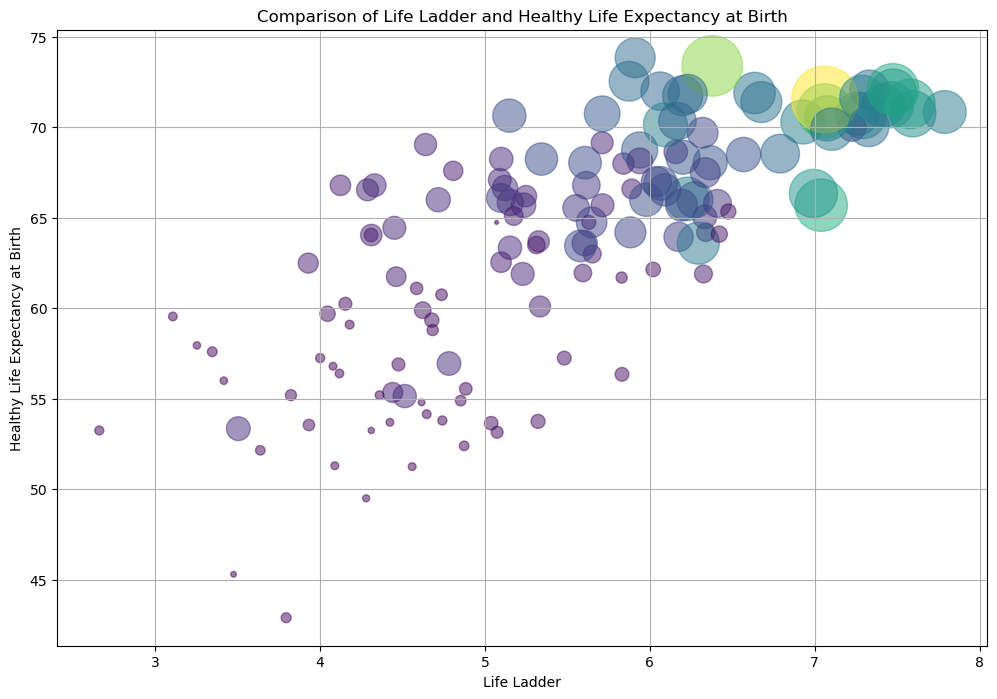

In [22]:
# Variables
x = whr_2017['Life Ladder']
y = whr_2017['Healthy life expectancy at birth']
size_data = np.exp(whr_2017['Log GDP per capita'])
colors = np.exp(whr_2017['Log GDP per capita'])

# Normalize the sizes and colors
size = size_data/50
#size = ((size_data - size_data.min()) / (size_data.max() - size_data.min()) * 1000 + 5)
norm_colors = (colors - colors.min()) / (colors.max() - colors.min())

# Colormap
# Scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(x, y, s=size, c=norm_colors, alpha=0.5) # Sizes and colors determined by original GDP per capita
#plt.colorbar(label='Comparitive GDP per capita') # Adding a colorbar to interpret the colors
plt.title('Comparison of Life Ladder and Healthy Life Expectancy at Birth')
plt.xlabel('Life Ladder')
plt.ylabel('Healthy Life Expectancy at Birth')
plt.grid(True)
plt.show()

**3. Longitudinal Analysis of Global Happiness Trends:**
   - Analysis how the overall happiness index has changed over the years from 2008 to 2023.
   - Identify countries that have experienced significant changes in happiness levels during this period.

In [23]:
# Group the data by 'Country name'
grouped_by_country = whr_filtered.groupby('Country name')
overall_happiness_index = grouped_by_country['Life Ladder'].mean()

earliest_year = whr_filtered['year'].min()
latest_year = whr_filtered['year'].max()
happiness_index_earliest_year = whr_filtered[whr_filtered['year'] == earliest_year].groupby('Country name')['Life Ladder'].mean()
happiness_index_latest_year = whr_filtered[whr_filtered['year'] == latest_year].groupby('Country name')['Life Ladder'].mean()

# Calculate the change in overall happiness index for each country relative to the earliest year
change_in_happiness = happiness_index_latest_year - happiness_index_earliest_year

# Get the top 5 countries with most positive change and most negative change
top_5_positive_change = change_in_happiness.nlargest(5)
top_5_negative_change = change_in_happiness.nsmallest(5)

# Display the results
print("Top 5 countries with the most significant positive change in happiness levels:")
for country, change in top_5_positive_change.iteritems():
    print(f"The ladder index of {country} changed from {happiness_index_earliest_year[country]} ({earliest_year}) to {happiness_index_latest_year[country]} ({latest_year}) with a change of {change}")

print("\nTop 5 countries with the most significant negative change in happiness levels:")
for country, change in top_5_negative_change.iteritems():
    print(f"The ladder index of {country} changed from {happiness_index_earliest_year[country]} ({earliest_year}) to {happiness_index_latest_year[country]} ({latest_year}) with a change of {change}")


Top 5 countries with the most significant positive change in happiness levels:
The ladder index of Congo (Brazzaville) changed from 3.82 (2008) to 5.805 (2022) with a change of 1.9849999999999999
The ladder index of Lithuania changed from 5.554 (2008) to 7.038 (2022) with a change of 1.484
The ladder index of Togo changed from 2.808 (2008) to 4.239 (2022) with a change of 1.431
The ladder index of El Salvador changed from 5.191 (2008) to 6.492 (2022) with a change of 1.3010000000000002
The ladder index of Mongolia changed from 4.493 (2008) to 5.788 (2022) with a change of 1.295

Top 5 countries with the most significant negative change in happiness levels:
The ladder index of Afghanistan changed from 3.724 (2008) to 1.281 (2022) with a change of -2.4430000000000005
The ladder index of Lebanon changed from 4.595 (2008) to 2.352 (2022) with a change of -2.243
The ladder index of Botswana changed from 5.451 (2008) to 3.435 (2022) with a change of -2.0159999999999996
The ladder index of Ba

In [24]:
# Assuming you have the DataFrame 'whr_filtered' with the relevant data
afghanistan_ladder = whr_filtered.loc[whr_filtered['Country name'] == 'Congo (Brazzaville)', ['year', 'Life Ladder']]

# Optionally, you can set the 'year' as the index
afghanistan_ladder.set_index('year', inplace=True)

# Display the result
print(afghanistan_ladder)


      Life Ladder
year             
2008        3.820
2011        4.510
2012        3.919
2013        3.955
2014        4.056
2015        4.691
2016        4.119
2017        4.884
2018        5.490
2019        5.213
2020        5.079
2021        4.921
2022        5.805


**4. Correlation Analysis:**
   - Perform correlation analysis to explore the relationships between various factors and happiness scores.
   - Identify which factors show strong positive or negative correlations with life satisfaction.

Correlation Analysis for the Year 2017:
Strongest positive correlation with Life Ladder: Log GDP per capita (Correlation coefficient: 0.7651362237464548)
Strongest negative correlation with Life Ladder: Negative affect (Correlation coefficient: -0.5781569765255152)


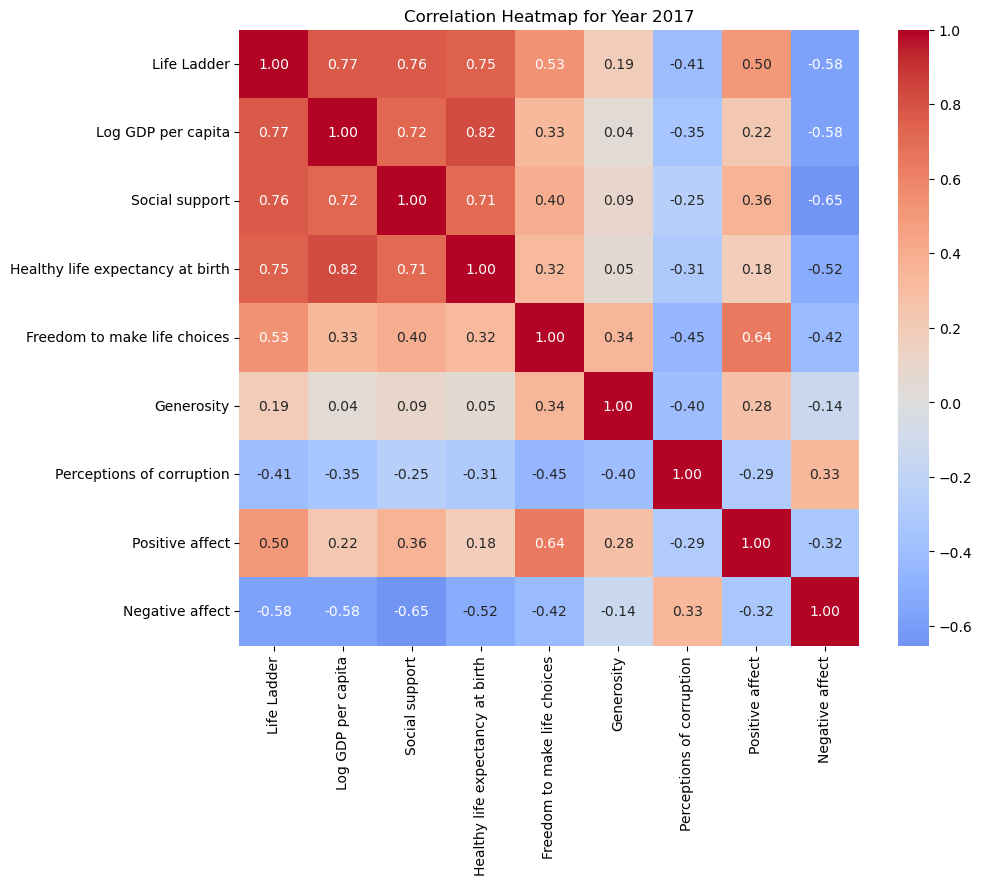

In [25]:
# Select the variables for correlation analysis
variables_for_correlation = [
    'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
    'Positive affect', 'Negative affect'
]

# Fill missing values with the mean value of each column
whr_2017_cleaned = whr_2017[variables_for_correlation].fillna(whr_2017[variables_for_correlation].mean())

# Compute the correlation matrix
correlation_matrix = whr_2017_cleaned.corr()

# Identify factors with strong positive or negative correlations with Life Ladder
strong_positive_corr = correlation_matrix['Life Ladder'].drop('Life Ladder').idxmax()
strong_negative_corr = correlation_matrix['Life Ladder'].drop('Life Ladder').idxmin()

# Get the correlation coefficients for the strong correlations
strong_positive_corr_coeff = correlation_matrix.loc['Life Ladder', strong_positive_corr]
strong_negative_corr_coeff = correlation_matrix.loc['Life Ladder', strong_negative_corr]

# Display the results
print("Correlation Analysis for the Year 2017:")
print(f"Strongest positive correlation with Life Ladder: {strong_positive_corr} (Correlation coefficient: {strong_positive_corr_coeff})")
print(f"Strongest negative correlation with Life Ladder: {strong_negative_corr} (Correlation coefficient: {strong_negative_corr_coeff})")# Plot the correlation heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title("Correlation Heatmap for Year 2017")
plt.show()


In [26]:
#print(correlation_matrix)

Based on the correlation matrix and the analysis of the relationships among the variables, the main factors that seem to have a strong influence on the Life Ladder (a measure of overall well-being) are:

**Log GDP per Capita (0.765)**: A strong positive correlation suggests that higher GDP per capita, reflecting greater economic prosperity, is a significant determinant of higher well-being. Wealthier countries tend to have more resources for education, healthcare, and other public services, which can contribute to higher life satisfaction.

**Social Support (0.761)**: This factor also shows a strong positive correlation with the Life Ladder, indicating that societies with strong social networks and supportive relationships enjoy higher levels of overall well-being. Social support can provide emotional resilience, enhance mental health, and foster a sense of belonging and community.

**Healthy Life Expectancy at Birth (0.748)**: There's a strong positive correlation between life expectancy and overall well-being. This relationship suggests that countries with better healthcare systems and longer life expectancies tend to have happier populations. The ability to live a longer, healthier life is a crucial factor in overall life satisfaction.

**Freedom to Make Life Choices (0.535)**: This moderate positive correlation reveals that greater autonomy and freedom in life choices are associated with increased overall well-being. The ability to pursue personal goals and make choices in line with one's values may contribute to a more fulfilling life.

**Negative Affect (-0.578)**: The strong negative correlation with negative affect emphasizes the negative impact of negative emotions on overall well-being. Societies with higher levels of stress, sadness, anger, or other negative feelings are likely to report lower overall life satisfaction.

**Perceptions of Corruption (-0.409)**: A moderate negative correlation with perceptions of corruption suggests that higher levels of perceived corruption are associated with lower overall well-being. Trust in institutions and governance is vital for societal well-being, and perceptions of corruption can undermine this trust.

In conclusion, the Life Ladder appears to be strongly influenced by economic factors (GDP per capita), social connections (Social Support), health outcomes (Healthy Life Expectancy), personal freedoms (Freedom to Make Life Choices), and emotional factors (Negative Affect). Perceptions of corruption also play a role but to a lesser extent. Efforts to enhance overall well-being might focus on improving these key areas, as they seem to have the most substantial impact on life satisfaction.

**5. Multiple Regression Analysis:**
   - Build a multiple regression model to assess the combined impact of economic development, social support, health, freedom, generosity, corruption perception, positive affect, and negative affect on the life satisfaction of individuals in different countries.
   - Interpret the regression coefficients and assess the significance of each variable in predicting happiness scores.

**6. Extreme Country Analysis:**
   - Compare happiness scores and key factors across different regions and continents.
   - Analyze regional patterns and identify potential cultural, economic, or social influences on happiness levels.

**7. Impact of Specific Events and Policies:**
   - Investigate how specific social, political, or economic events have affected happiness scores in individual countries.
   - Analyze the impact of government policies and initiatives aimed at promoting wellbeing and happiness.

**8. Conclusion and Recommendations:**
   - Summarize the key findings and insights gained from the analysis.
   - Discuss the implications of the study's results on understanding happiness and wellbeing at a global level.
   - Provide recommendations for policymakers and governments based on the identified factors that have the most significant influence on life satisfaction.

**9. Presentation and Reporting:**
   - Create visual presentations summarizing the research findings, including graphs, charts, and tables.
   - Write a comprehensive report documenting the research process, data analysis methods, results, and conclusions.

**10. Future Directions:**
   - Suggest potential areas for further research and exploration within the realm of happiness and wellbeing studies.
   - Discuss limitations of the current study and propose ways to improve data collection and analysis for future research.

**Note:** Throughout the project, it is essential to use appropriate statistical techniques and data visualization tools to ensure robust and accurate analysis of the dataset. Additionally, the project should adhere to ethical considerations regarding data privacy and confidentiality.